#  采用传统的机器学习方法来进行房价预测


# baseline 最简单的方式来搭建模型

In [1]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family']='sans-serif'

In [2]:
train_data = pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')

<font color=red>可以看出除了 saleprice之外 还有80个feature，其中:<br>
    *Alley<br>
    *MasVnrType<br>
    *MasVnrArea<br>
    *BsmtQual<br>
    *BsmtCond<br>         
    *BsmtExposure<br>   
    *BsmtFinType1<br> 
    *BsmtFinType2<br>
    *Electrical<br>
    *GarageType<br>       
    *GarageYrBlt<br>  
    *GarageFinish<br> 
    *PoolQC<br>         
    *Fence<br>       
    *MiscFeature<br>   
    
    等几项数据有缺失

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

首先看一下房价的分布

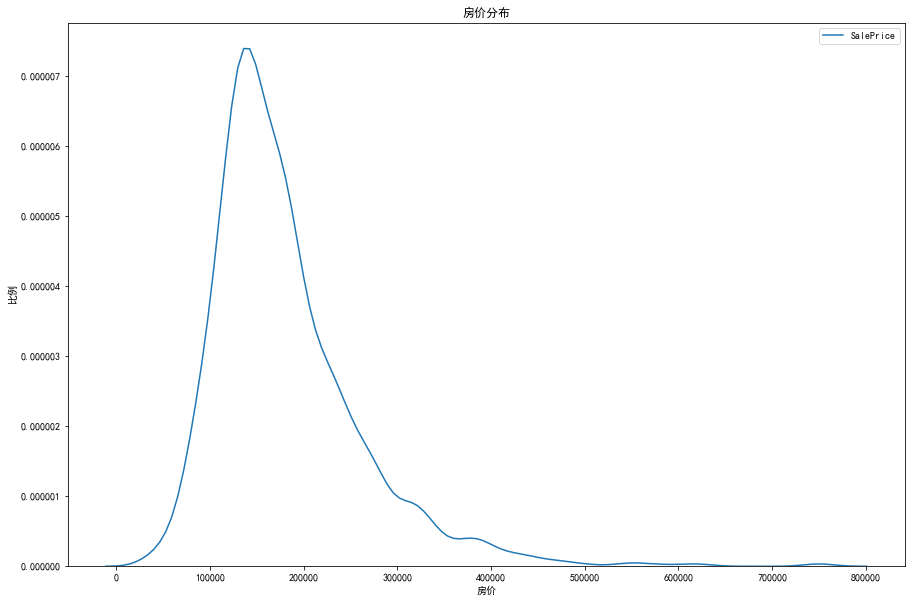

In [4]:
houseprice = train_data['SalePrice']
fig = plt.figure(figsize=(15,10))
plt.title(u'房价分布')
plt.xlabel(u'房价')
plt.ylabel(u'比例')

sns.kdeplot(houseprice)

首先进行缺失值的处理，看看各个缺失值对房价的影响

In [5]:
na_count = train_data.isnull().sum().sort_values(ascending =False)
na_rate  = na_count / train_data.shape[0]
na_sample = pd.DataFrame({'count':na_count,'rate':na_rate})

<font color=red> 一共有19个变量有缺失，首先看看各个变量对price的影响

In [6]:
na_sample.head(20)

,count,rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


绘制散点图 看看相关性

In [7]:
have_na = train_data.loc[:,train_data.isnull().sum()!=0]
have_na = pd.concat([have_na,train_data['SalePrice']],axis = 1)

首先看看协方差 各个数据的
<font color=red> 可以看出以上3个量和房价呈现 轻微正相关性
    可以考虑使用机器学习方法填充缺失数据

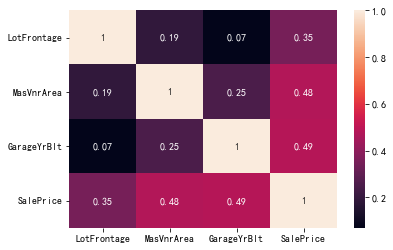

In [8]:
sns.heatmap(have_na.corr(),annot=True)

# 1、PoolQc/MiscFeature/Alley/Fence缺失值 太多 考虑丢弃本条数据

# 2、FireplaceQu  暂时可以看出 带有Ex标签的房价均价偏高

In [9]:
FireplaceQu_Data = have_na[['FireplaceQu','SalePrice']].groupby(['FireplaceQu'],as_index = False).mean()

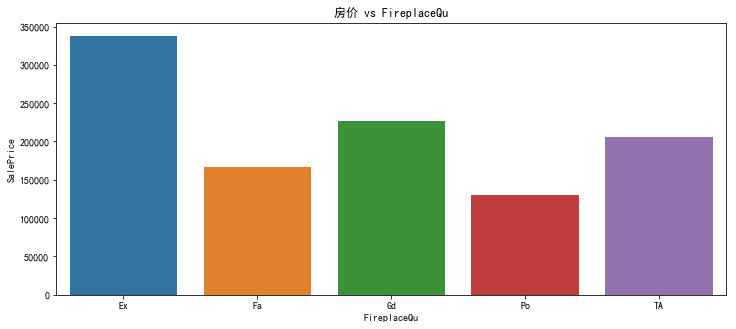

In [10]:
plt.figure(figsize=(12,5))
plt.xlabel('FireplaceQu')
plt.ylabel(u'房价')
plt.title(u'房价 vs FireplaceQu')

sns.barplot(x= 'FireplaceQu',y = 'SalePrice',data = FireplaceQu_Data)

# 3、LotFrontage 散点图(考虑丢弃)

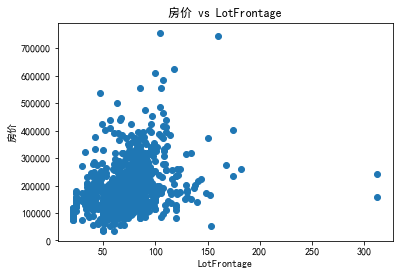

In [11]:
fig ,ax = plt.subplots()
plt.xlabel('LotFrontage')
plt.ylabel(u'房价')
plt.title(u'房价 vs LotFrontage')

ax.scatter(x = have_na['LotFrontage'],y=have_na['SalePrice'])
plt.show()

# 4、GarageCond(好像并没什么关系, EX平均价格还比价低  考虑丢弃) 

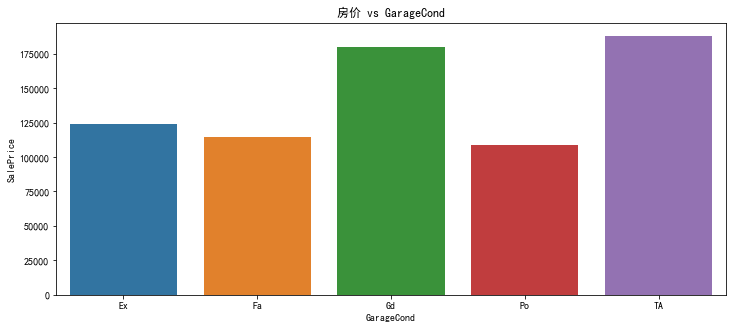

In [12]:
GarageCond_Data = have_na[['GarageCond','SalePrice']].groupby(['GarageCond'],as_index = False).mean()


plt.figure(figsize=(12,5))
plt.xlabel('GarageCond')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageCond')

sns.barplot(x= 'GarageCond',y = 'SalePrice',data = GarageCond_Data)

# 5、GarageType
(好像并没什么关系, EX平均价格还比价低  考虑丢弃) 

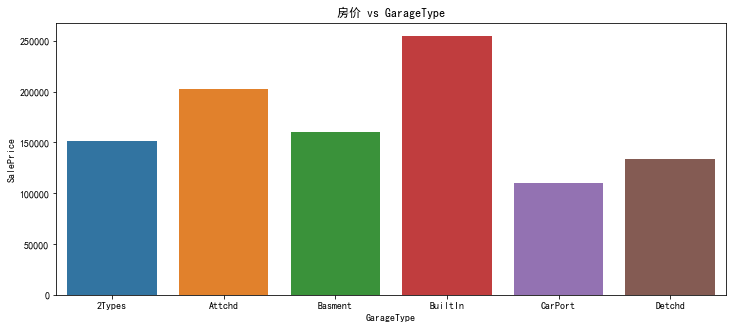

In [13]:
GarageType_Data = have_na[['GarageType','SalePrice']].groupby(['GarageType'],as_index = False).mean()


plt.figure(figsize=(12,5))
plt.xlabel('GarageType')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageType')

sns.barplot(x= 'GarageType',y = 'SalePrice',data = GarageType_Data)

# 6、GarageYrBlt

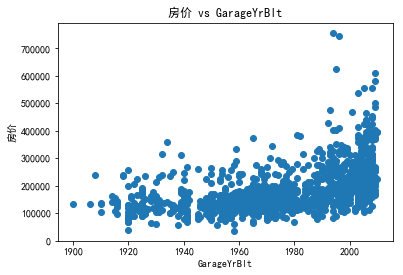

In [14]:
fig ,ax = plt.subplots()
plt.xlabel('GarageYrBlt')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageYrBlt')

ax.scatter(x = have_na['GarageYrBlt'],y=have_na['SalePrice'])
plt.show()


# GarageFinish  (NA表示没有车库）
  需要保留，可以看出车库完成度和价格成正比
  Fin>Rfn>Uf>NAN
 

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


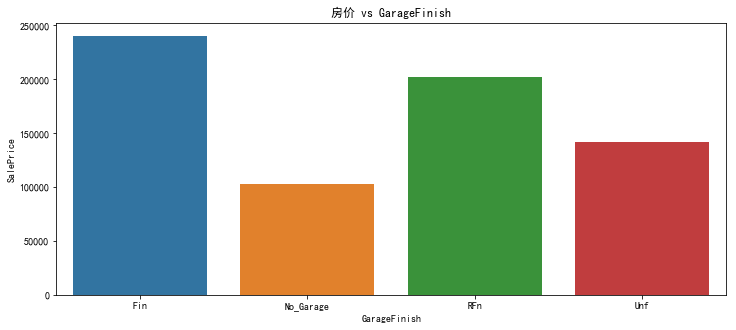

In [15]:
GarageFinish_Data = have_na[['GarageFinish','SalePrice']]
GarageFinish_Data.loc[GarageFinish_Data.GarageFinish.isnull(),'GarageFinish'] = 'No_Garage'
GarageFinish_Data = GarageFinish_Data.groupby(['GarageFinish'],as_index = False).mean()


plt.figure(figsize=(12,5))
plt.xlabel('GarageFinish')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageFinish')

sns.barplot(x= 'GarageFinish',y = 'SalePrice',data = GarageFinish_Data)

# GarageQual(车库质量)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


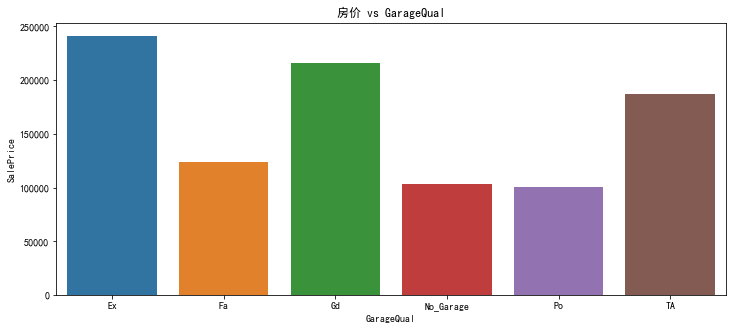

In [16]:
GarageQual = have_na[['GarageQual','SalePrice']]
GarageQual.loc[GarageQual.GarageQual.isnull(),'GarageQual'] = 'No_Garage'
GarageQual = GarageQual.groupby(['GarageQual'],as_index = False).mean()


plt.figure(figsize=(12,5))
plt.xlabel('GarageQual')
plt.ylabel(u'房价')
plt.title(u'房价 vs GarageQual')

sns.barplot(x= 'GarageQual',y = 'SalePrice',data = GarageQual)

#  BsmtExposure

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


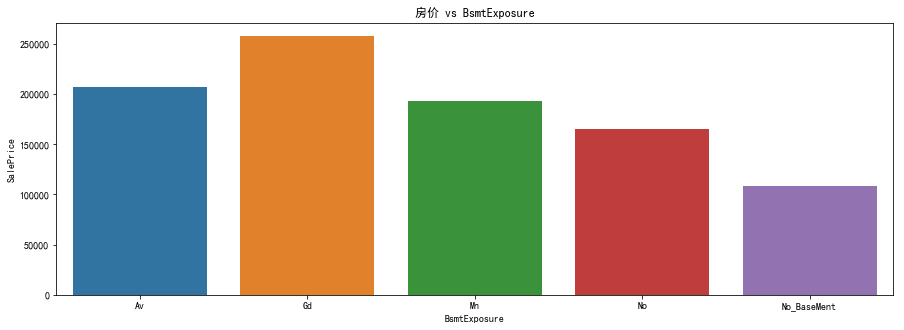

In [17]:
BsmtExposure = have_na[['BsmtExposure','SalePrice']]
BsmtExposure.loc[BsmtExposure.BsmtExposure.isnull(),'BsmtExposure'] = 'No_BaseMent'
BsmtExposure = BsmtExposure.groupby(['BsmtExposure'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('BsmtExposure')
plt.ylabel(u'房价')
plt.title(u'房价 vs BsmtExposure')

sns.barplot(x= 'BsmtExposure',y = 'SalePrice',data = BsmtExposure)

# BsmtFinType1 & BsmtFinType2(去除？)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


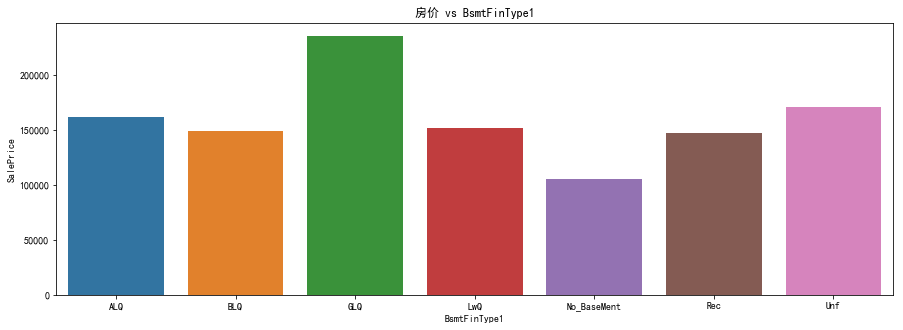

In [18]:
BsmtFinType1 = have_na[['BsmtFinType1','SalePrice']]
BsmtFinType1.loc[BsmtFinType1.BsmtFinType1.isnull(),'BsmtFinType1'] = 'No_BaseMent'
BsmtFinType1 = BsmtFinType1.groupby(['BsmtFinType1'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('BsmtFinType1')
plt.ylabel(u'房价')
plt.title(u'房价 vs BsmtFinType1')

sns.barplot(x= 'BsmtFinType1',y = 'SalePrice',data = BsmtFinType1)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


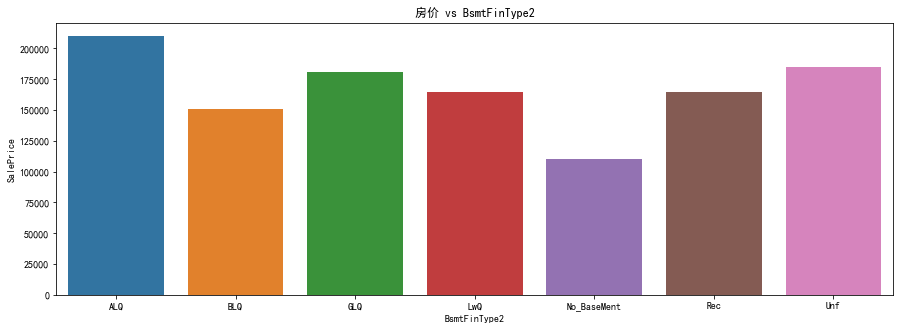

In [19]:
BsmtFinType2 = have_na[['BsmtFinType2','SalePrice']]
BsmtFinType2.loc[BsmtFinType2.BsmtFinType2.isnull(),'BsmtFinType2'] = 'No_BaseMent'
BsmtFinType2 = BsmtFinType2.groupby(['BsmtFinType2'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('BsmtFinType2')
plt.ylabel(u'房价')
plt.title(u'房价 vs BsmtFinType2')

sns.barplot(x= 'BsmtFinType2',y = 'SalePrice',data = BsmtFinType2)

# BsmtCond

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


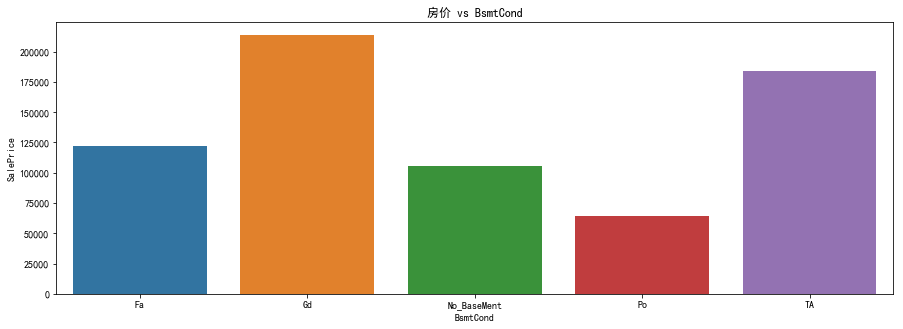

In [20]:
BsmtCond = have_na[['BsmtCond','SalePrice']]
BsmtCond.loc[BsmtCond.BsmtCond.isnull(),'BsmtCond'] = 'No_BaseMent'
BsmtCond = BsmtCond.groupby(['BsmtCond'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('BsmtCond')
plt.ylabel(u'房价')
plt.title(u'房价 vs BsmtCond')

sns.barplot(x= 'BsmtCond',y = 'SalePrice',data = BsmtCond)

# MasVnrArea

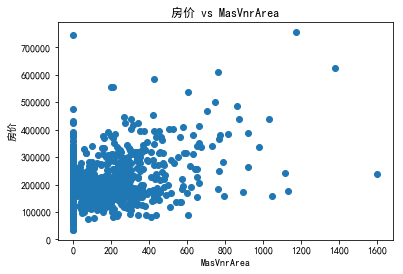

In [21]:
fig ,ax = plt.subplots()
plt.xlabel('MasVnrArea')
plt.ylabel(u'房价')
plt.title(u'房价 vs MasVnrArea')

ax.scatter(x = have_na['MasVnrArea'],y=have_na['SalePrice'])
plt.show()


# MasVnrType


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


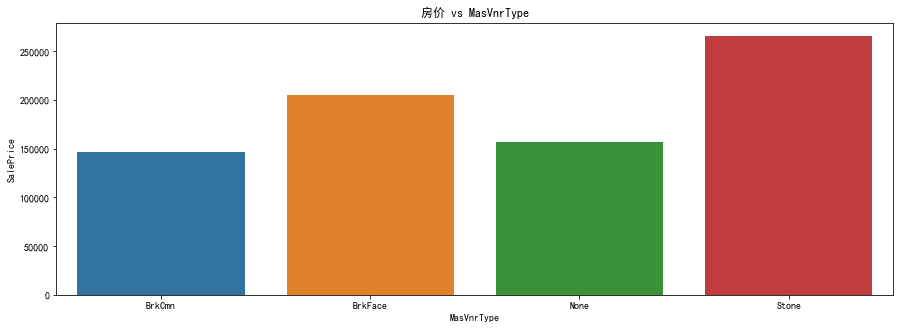

In [22]:
MasVnrType = have_na[['MasVnrType','SalePrice']]
MasVnrType.loc[MasVnrType.MasVnrType.isnull(),'MasVnrType'] = 'None'
MasVnrType = MasVnrType.groupby(['MasVnrType'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('MasVnrType')
plt.ylabel(u'房价')
plt.title(u'房价 vs MasVnrType')

sns.barplot(x= 'MasVnrType',y = 'SalePrice',data = MasVnrType)

# Electrical

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


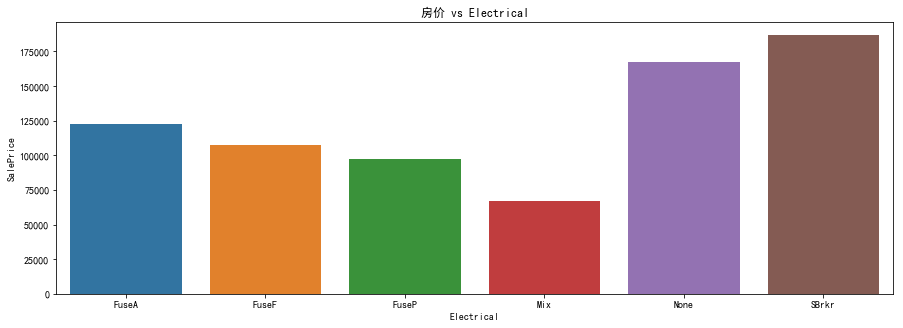

In [23]:
Electrical = have_na[['Electrical','SalePrice']]
Electrical.loc[Electrical.Electrical.isnull(),'Electrical'] = 'None'
Electrical = Electrical.groupby(['Electrical'],as_index = False).mean()


plt.figure(figsize=(15,5))
plt.xlabel('Electrical')
plt.ylabel(u'房价')
plt.title(u'房价 vs Electrical')

sns.barplot(x= 'Electrical',y = 'SalePrice',data = Electrical)

In [24]:
train_data_no_na = train_data.dropna(axis=1)

In [25]:
train_data_no_na_corr=train_data_no_na.corr()
train_data_no_na_corr_upper = train_data_no_na_corr['SalePrice'].loc[train_data_no_na_corr.SalePrice>0.5 ]

train_data_no_na_corr_low = train_data_no_na_corr['SalePrice'].loc[train_data_no_na_corr.SalePrice<-0.5]

train_data_no_na_corr = pd.concat([train_data_no_na_corr_upper,train_data_no_na_corr_low],axis= 0)

In [26]:
train_data_no_na_corr.sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

# 可以看出:
* <font color =red> OverallQual <font>
* <font color =red> GrLivArea        <font>
* <font color =red> GarageCars              <font>
* <font color =red> GarageArea       <font>
* <font color =red> TotalBsmtSF      <font>
* <font color =red> 1stFlrSF         <font>
* <font color =red> FullBath         <font>
* <font color =red> TotRmsAbvGrd     <font>
* <font color =red> YearBuilt            <font>    
* <font color =red> YearRemodAdd     <font>
    
    
    和房价均具有很强的相关性这些特征需要保留、再看看这些特征的相关性

In [27]:
train_data_no_na_corr.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [28]:
corr_feature = train_data[train_data_no_na_corr.index]

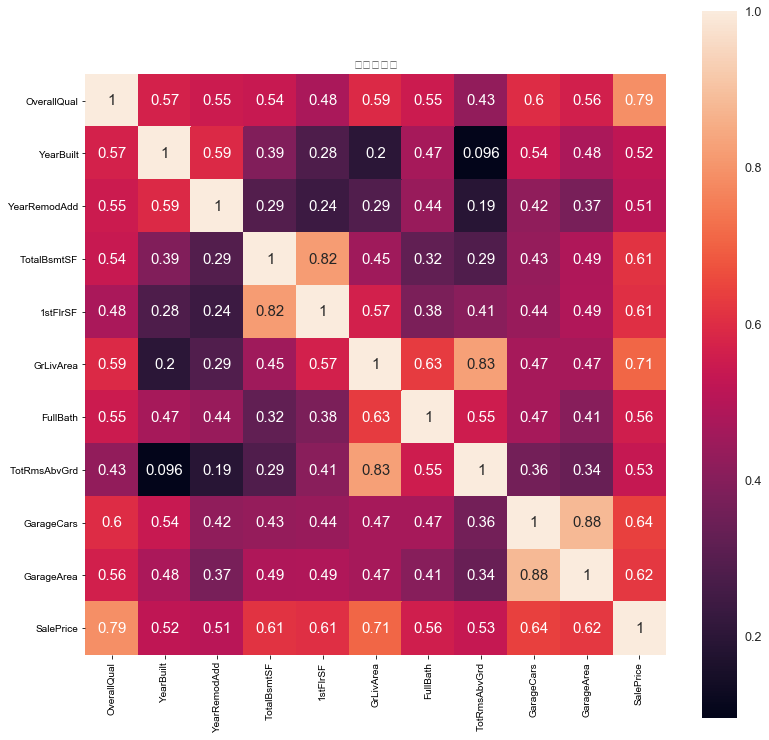

In [29]:
fig = plt.figure(figsize=(13,13))
plt.title(u'协方差矩阵')
sns.set(font_scale=1.25) 
sns.heatmap(corr_feature.corr(),annot=True,cbar=True,square=True)

In [30]:
train_data.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

#  下面进行特征工程

<font color = red>首先是缺失值的处理

In [31]:
na_sample.head(20)

,count,rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [32]:
# 首先合并train_data和test_data

train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
train_len = train.shape[0]
test_len = test.shape[0]
train = train.drop(['SalePrice'],axis = 1)
combine_data = pd.concat([train,test],axis = 0)
combine_data.shape

(2919, 80)

In [33]:
#首先处理PoolQC 对于NA 填充None 表示没有泳池,其他几项字符型的特征也是一样
combine_data['PoolQC']=combine_data['PoolQC'].fillna('None')
combine_data['MiscFeature']=combine_data['MiscFeature'].fillna('None')
combine_data['Alley']=combine_data['Alley'].fillna('None')
combine_data['Fence']=combine_data['Fence'].fillna('None')
combine_data['FireplaceQu']=combine_data['FireplaceQu'].fillna('None')
combine_data['GarageCond']=combine_data['GarageCond'].fillna('None')
combine_data['GarageType']=combine_data['GarageType'].fillna('None')
combine_data['GarageFinish']=combine_data['GarageFinish'].fillna('None')
combine_data['GarageQual']=combine_data['GarageQual'].fillna('None')
combine_data['BsmtExposure']=combine_data['BsmtExposure'].fillna('None')
combine_data['BsmtFinType2']=combine_data['BsmtFinType2'].fillna('None')
combine_data['BsmtFinType1']=combine_data['BsmtFinType1'].fillna('None')
combine_data['BsmtFinType1']=combine_data['BsmtFinType1'].fillna('None')
combine_data['BsmtCond']=combine_data['BsmtFinType1'].fillna('None')
combine_data['MasVnrType']=combine_data['MasVnrType'].fillna('None')
combine_data['Electrical']=combine_data['Electrical'].fillna(combine_data['Electrical'].mode()[0])

In [34]:
#下面处理有缺失值的数值特征
combine_data['LotFrontage']=combine_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
combine_data['GarageYrBlt']=combine_data['GarageYrBlt'].fillna(0)
combine_data['MasVnrArea']=combine_data['MasVnrArea'].fillna(0)

In [35]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combine_data[col] = combine_data[col].fillna(0)

In [36]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combine_data[col] = combine_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combine_data[col] = combine_data[col].fillna('None')
combine_data = combine_data.drop(['Utilities'], axis=1)

In [37]:
combine_data["Functional"] = combine_data["Functional"].fillna("Typ")
combine_data['KitchenQual'] = combine_data['KitchenQual'].fillna(combine_data['KitchenQual'].mode()[0])
combine_data['Exterior1st'] = combine_data['Exterior1st'].fillna(combine_data['Exterior1st'].mode()[0])
combine_data['Exterior2nd'] = combine_data['Exterior2nd'].fillna(combine_data['Exterior2nd'].mode()[0])
combine_data['SaleType'] = combine_data['SaleType'].fillna(combine_data['SaleType'].mode()[0])
combine_data['MSSubClass'] = combine_data['MSSubClass'].fillna("None")
combine_data['MSZoning'] = combine_data['MSZoning'].fillna(combine_data['MSZoning'].mode()[0])

#   至上一步已经填充完成所有的缺失值
#   下面应该进行一些编码
   首先进行one-hot编码
   将一些实际上是catagory的数据转化

In [38]:
combine_data['MSSubClass'] = combine_data['MSSubClass'].astype(str)
combine_data['OverallQual'] = combine_data['OverallQual'].astype(str)
combine_data['OverallCond'] = combine_data['OverallCond'].astype(str)                                      

# 接下来将数据标准化

In [39]:
combine_data.drop(['Id'],axis=1,inplace=True)
numeric_featrue = combine_data.select_dtypes(exclude = 'object').columns

In [40]:
combine_data.drop(['YrSold','MoSold'],axis=1,inplace=True)
numeric_featrue = combine_data.select_dtypes(exclude = 'object').columns
numeric_featrue

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [41]:
# 标准化数值数据
from sklearn import preprocessing
def standerlize(data,feature):
    stander = preprocessing.StandardScaler()
    data.loc[:,feature] = stander.fit_transform(data.loc[:,feature])

In [42]:
standerlize(combine_data,numeric_featrue)

In [43]:
#之后对整个数据进行one-hot编码
catagory_feature = combine_data.select_dtypes(include='object').columns

In [44]:
combine_dummies=pd.get_dummies(combine_data)

In [45]:
#至此已经将数据全部处理完成，将train和test分开

train_processed =  combine_dummies.iloc[0:train_len,:]
test_processed  =  combine_dummies.iloc[train_len:,:]

In [51]:
#下面建立评估模型
#还需对房价进行归一化处理
y_train = np.log(train_data.pop('SalePrice'))

train_processed = pd.concat([train_processed,y_train],axis=1)

In [52]:
train_processed

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,-0.209359,-0.217879,1.046258,0.896833,0.529034,0.581145,-0.293025,-0.934165,-0.443078,-0.773861,...,0,0,1,0,0,0,0,1,0,12.247694
1,0.481900,-0.072044,0.154764,-0.395604,-0.567016,1.178255,-0.293025,-0.629284,0.477463,0.261075,...,0,0,1,0,0,0,0,1,0,12.109011
2,-0.071107,0.137197,0.980221,0.848965,0.338903,0.098189,-0.293025,-0.287999,-0.297968,-0.610718,...,0,0,1,0,0,0,0,1,0,12.317167
3,-0.439779,-0.078385,-1.859351,-0.682812,-0.567016,-0.494529,-0.293025,-0.046824,-0.669812,-0.506205,...,0,0,1,1,0,0,0,0,0,11.849398
4,0.666236,0.518903,0.947203,0.753229,1.390216,0.469187,-0.293025,-0.160586,0.212184,-0.037170,...,0,0,1,0,0,0,0,1,0,12.429216
5,0.712320,0.500515,0.716075,0.513889,-0.567016,0.638222,-0.293025,-1.129835,-0.579118,-0.926807,...,0,0,1,0,0,0,0,1,0,11.870600
6,0.251480,-0.010667,1.079276,0.992569,0.473113,2.036599,-0.293025,-0.554201,1.438817,1.362287,...,0,0,1,0,0,0,0,1,0,12.634603
7,0.481900,0.027123,0.055709,-0.539208,0.775086,0.917019,-0.103844,-0.783999,0.126025,-0.134036,...,0,0,1,0,0,0,0,1,0,12.206073
8,-0.854534,-0.513352,-1.331059,-1.640173,-0.567016,-0.968705,-0.293025,0.890571,-0.225413,-0.350710,...,0,0,1,1,0,0,0,0,0,11.774520
9,-0.900618,-0.348496,-1.066912,-1.640173,-0.567016,0.899457,-0.293025,-0.956917,-0.136987,-0.210509,...,0,0,1,0,0,0,0,1,0,11.678440


In [55]:
train_processed.to_csv('data/train_data_process.csv',index=False,sep=',')
test_processed.to_csv('data/test_data_process.csv',index=False,sep=',')

In [18]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    #Random Forest
    rf_est = ensemble.RandomForestRegressor(random_state=42)
    rf_param_grid = {'n_estimators':[10,100,200],'max_depth':[10,100,200]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=-1, cv=5, verbose=1,refit = True,scoring='neg_mean_squared_error')
    
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    #将feature按Importance排序
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print ('Sample 25 Features from RF Classifier')
    print (str(features_top_n_rf[:25]))
    print (rf_grid.best_estimator_)
    
    #AddBoost
    ada_est = ensemble.AdaBoostRegressor(random_state=42)
    ada_param_grid = {'n_estimators': [50,100,200], 'learning_rate': [0.01,0.1,0.5, 0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=-1, cv=5, verbose=1,scoring='neg_mean_squared_error')
#     ada_grid = ada_grid.best_estimator_
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    
    #sort
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print ('Sample 25 Features from Ada Classifier')
    print (str(features_top_n_ada[:25]))
    
     # ExtraTree
    et_est = ensemble.ExtraTreesRegressor(random_state=42)
    et_param_grid = {'n_estimators': [10,100,200], 'min_samples_split': [2, 4], 'max_depth': [10,50,100]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=-1, cv=5, verbose=1,scoring='neg_mean_squared_error')
#     et_grid = et_grid.best_estimator_
    et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
        #排序
    feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print( 'Sample 25 Features from ET Classifier')
    print (str(features_top_n_et[:25]))
    
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et], ignore_index=True).drop_duplicates()
    

    return features_top_n

In [19]:
get_feature = get_top_n_features(train_processed,y_train,30)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 

In [41]:
X_train_top  = train_processed[get_feature]
X_test_top   = test_processed[get_feature]

In [43]:
X_train_top = pd.concat([X_train_top,y_train],axis=1)

In [44]:
X_train_top

,GrLivArea,YearBuilt,ExterQual_TA,GarageCars,TotalBsmtSF,1stFlrSF,GarageArea,BsmtFinSF1,LotArea,FireplaceQu_None,...,ExterQual_Fa,GarageType_Detchd,MSSubClass_60,MSSubClass_30,OverallQual_7,MSZoning_RM,OverallQual_4,Condition1_Norm,Neighborhood_NoRidge,SalePrice
0,0.413547,1.046258,0,0.307040,-0.443078,-0.773861,0.349364,0.581145,-0.217879,1,...,0,0,1,0,1,0,0,1,0,12.247694
1,-0.471891,0.154764,1,0.307040,0.477463,0.261075,-0.058991,1.178255,-0.072044,0,...,0,0,0,0,0,0,0,0,0,12.109011
2,0.563755,0.980221,0,0.307040,-0.297968,-0.610718,0.627787,0.098189,0.137197,0,...,0,0,1,0,1,0,0,1,0,12.317167
3,0.427382,-1.859351,1,1.619264,-0.669812,-0.506205,0.785561,-0.494529,-0.078385,0,...,0,1,0,0,1,0,0,1,0,11.849398
4,1.378042,0.947203,0,1.619264,0.212184,-0.037170,1.685798,0.469187,0.518903,0,...,0,0,1,0,0,0,0,1,1,12.429216
5,-0.274248,0.716075,1,0.307040,-0.579118,-0.926807,0.033817,0.638222,0.500515,1,...,0,0,0,0,0,0,0,1,0,11.870600
6,0.381924,1.079276,0,0.307040,1.438817,1.362287,0.757719,2.036599,-0.010667,0,...,0,0,0,0,0,0,0,1,0,12.634603
7,1.164588,0.055709,1,0.307040,0.126025,-0.134036,0.052378,0.917019,0.027123,0,...,0,0,1,0,1,0,0,0,0,12.206073
8,0.540038,-1.331059,1,0.307040,-0.225413,-0.350710,-0.021868,-0.968705,-0.513352,0,...,0,1,0,0,1,1,0,0,0,11.774520
9,-0.837529,-1.066912,1,-1.005184,-0.136987,-0.210509,-1.242293,0.899457,-0.348496,0,...,0,0,0,0,0,0,0,0,0,11.678440


In [45]:
X_train_top.to_csv('data/train_processed.csv',index=False,sep=',')
X_test_top.to_csv('data/test_processed.csv',index=False,sep=',')

In [94]:
train_processed

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,SalePrice,SalePrice
0,-0.209359,-0.217879,1.046258,0.896833,0.529034,0.581145,-0.293025,-0.934165,-0.443078,-0.773861,...,1,0,0,0,0,1,0,12.247694,12.247694,12.247694
1,0.481900,-0.072044,0.154764,-0.395604,-0.567016,1.178255,-0.293025,-0.629284,0.477463,0.261075,...,1,0,0,0,0,1,0,12.109011,12.109011,12.109011
2,-0.071107,0.137197,0.980221,0.848965,0.338903,0.098189,-0.293025,-0.287999,-0.297968,-0.610718,...,1,0,0,0,0,1,0,12.317167,12.317167,12.317167
3,-0.439779,-0.078385,-1.859351,-0.682812,-0.567016,-0.494529,-0.293025,-0.046824,-0.669812,-0.506205,...,1,1,0,0,0,0,0,11.849398,11.849398,11.849398
4,0.666236,0.518903,0.947203,0.753229,1.390216,0.469187,-0.293025,-0.160586,0.212184,-0.037170,...,1,0,0,0,0,1,0,12.429216,12.429216,12.429216
5,0.712320,0.500515,0.716075,0.513889,-0.567016,0.638222,-0.293025,-1.129835,-0.579118,-0.926807,...,1,0,0,0,0,1,0,11.870600,11.870600,11.870600
6,0.251480,-0.010667,1.079276,0.992569,0.473113,2.036599,-0.293025,-0.554201,1.438817,1.362287,...,1,0,0,0,0,1,0,12.634603,12.634603,12.634603
7,0.481900,0.027123,0.055709,-0.539208,0.775086,0.917019,-0.103844,-0.783999,0.126025,-0.134036,...,1,0,0,0,0,1,0,12.206073,12.206073,12.206073
8,-0.854534,-0.513352,-1.331059,-1.640173,-0.567016,-0.968705,-0.293025,0.890571,-0.225413,-0.350710,...,1,1,0,0,0,0,0,11.774520,11.774520,11.774520
9,-0.900618,-0.348496,-1.066912,-1.640173,-0.567016,0.899457,-0.293025,-0.956917,-0.136987,-0.210509,...,1,0,0,0,0,1,0,11.678440,11.678440,11.678440


In [95]:
train_processed = pd.concat([train_processed,y_train],axis=1)
train_processed=train_processed.drop_duplicates(inplace=True)

In [97]:
train_processed

#  可以看出alpha在15的时候 可以达到最优值

Text(0.5,1,'Alpha vs CV Error')

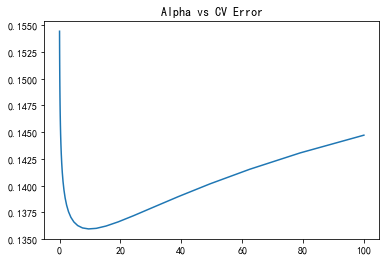

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-3,2,50)
test_scores = list()
for alpha  in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(alphas,test_scores)
plt.title('Alpha vs CV Error')

<font color =red> 采用RandomForest

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

rf_clf = ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=42, verbose=1, warm_start=False)

rf_clf.fit(X_train_top,y_train)

# rf_clf = ensemble.RandomForestRegressor(random_state=42,verbose=1,n_jobs=-1)
# rf_param_grid = {'n_estimators':[100,200,500],'max_features' :[0.1,0.3,0.5,0.7,0.9,0.99],'max_depth' :[10,100,200]}
# rf_grid = GridSearchCV(rf_clf,rf_param_grid,n_jobs=-1,scoring='neg_mean_squared_error',
#                        cv=10,verbose=1,refit=True)
# rf_grid.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=42, verbose=1, warm_start=False)

In [23]:
# rf_grid_best = rf_grid.best_estimator_
# rf_grid_best.fit(X_train,y_train)

In [33]:
# bagging_clf = ensemble.BaggingRegressor(base_estimator=Ridge(15),random_state=42,verbose=1,n_jobs=-1)
# bagging_param_grid = {'n_estimators':[10,50,100,200],'max_features' :[0.1,0.3,0.5,0.7,0.9,0.99]}
# bagging_grid = GridSearchCV(bagging_clf,bagging_param_grid,n_jobs=-1,scoring='neg_mean_squared_error',
#                        cv=10,verbose=1,refit=True)
# bagging_grid.fit(X_train,y_train)
bagging_clf = ensemble.BaggingRegressor(
         bootstrap=True, bootstrap_features=False, max_features=0.99,
         max_samples=0.8, n_estimators=20, n_jobs=-1, oob_score=False,
         random_state=42, verbose=1, warm_start=False)
bagging_clf.fit(X_train_top,y_train)

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.8s finished


BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.99, max_samples=0.8,
         n_estimators=20, n_jobs=-1, oob_score=False, random_state=42,
         verbose=1, warm_start=False)

In [25]:
# bagging_best = bagging_grid.best_estimator_
# bagging_best.fit(X_train,y_train)

In [26]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                         n_jobs=-1,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(u'训练样本数')
    plt.ylabel(u'训练得分')
    train_sizes,train_scores,test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs ,train_sizes=train_sizes,verbose=1,scoring ='neg_mean_squared_error' )
    train_scores_mean = np.mean(train_scores,axis =1)
    train_scores_std  =np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,
                     test_scores_mean+test_scores_std,alpha =0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',
             label=u'训练得分')
    plt.plot(train_sizes,test_scores_mean,'o-',color = 'g',
             label=u'交叉验证得分')
    plt.legend(loc='best')
    return plt

[learning_curve] Training set sizes: [ 97 316 535 754 973]


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.5s finished


<module 'matplotlib.pyplot' from 'C:\\Users\\lenovo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

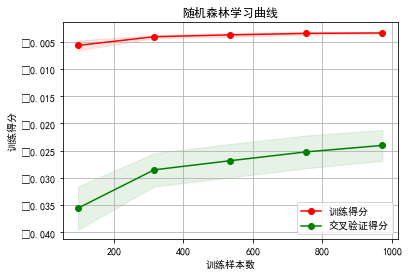

In [36]:
plot_learning_curve(rf_clf,u'随机森林学习曲线',X_train_top,y_train)

[learning_curve] Training set sizes: [ 97 316 535 754 973]


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.9s finished


<module 'matplotlib.pyplot' from 'C:\\Users\\lenovo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

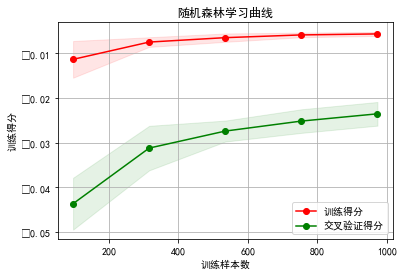

In [34]:
plot_learning_curve(bagging_clf,u'随机森林学习曲线',X_train,y_train)

In [32]:
rf_predict = np.expm1(rf_clf.predict(X_test_top))
bagging_predict = np.expm1(bagging_clf.predict(X_test_top))
final_predict =  (rf_predict+bagging_predict)/2

submission = pd.DataFrame({'id':test.index+1461,'SalePrice':final_predict},columns=['id','SalePrice'])
submission.to_csv('data/submission_data.csv',index=False,sep=',')


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.5s finished


#  最终Score 0.14

In [37]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12